# Figure 4: Time series cross validation scheme

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @author: Manuel Pirker

## Imports

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import matplotlib.ticker as ticker
import matplotlib


## Functions

In [3]:
def getPolygon(x: tuple, y:float, w:float=0.4, color:str="forestgreen"):
    coords = [(x[0],y+w/2),
              (x[1],y+w/2),
              (x[1],y-w/2),
              (x[0],y-w/2),
             ]
    return plt.Polygon(coords, facecolor = color, alpha = 0.7, edgecolor="k", ls="-", lw=0.8)

## Init

In [4]:
# path
PLOT_PATH = r"plots"

inital_year = 2011
n_samples   = 244321
n_folds     = 7

## Main

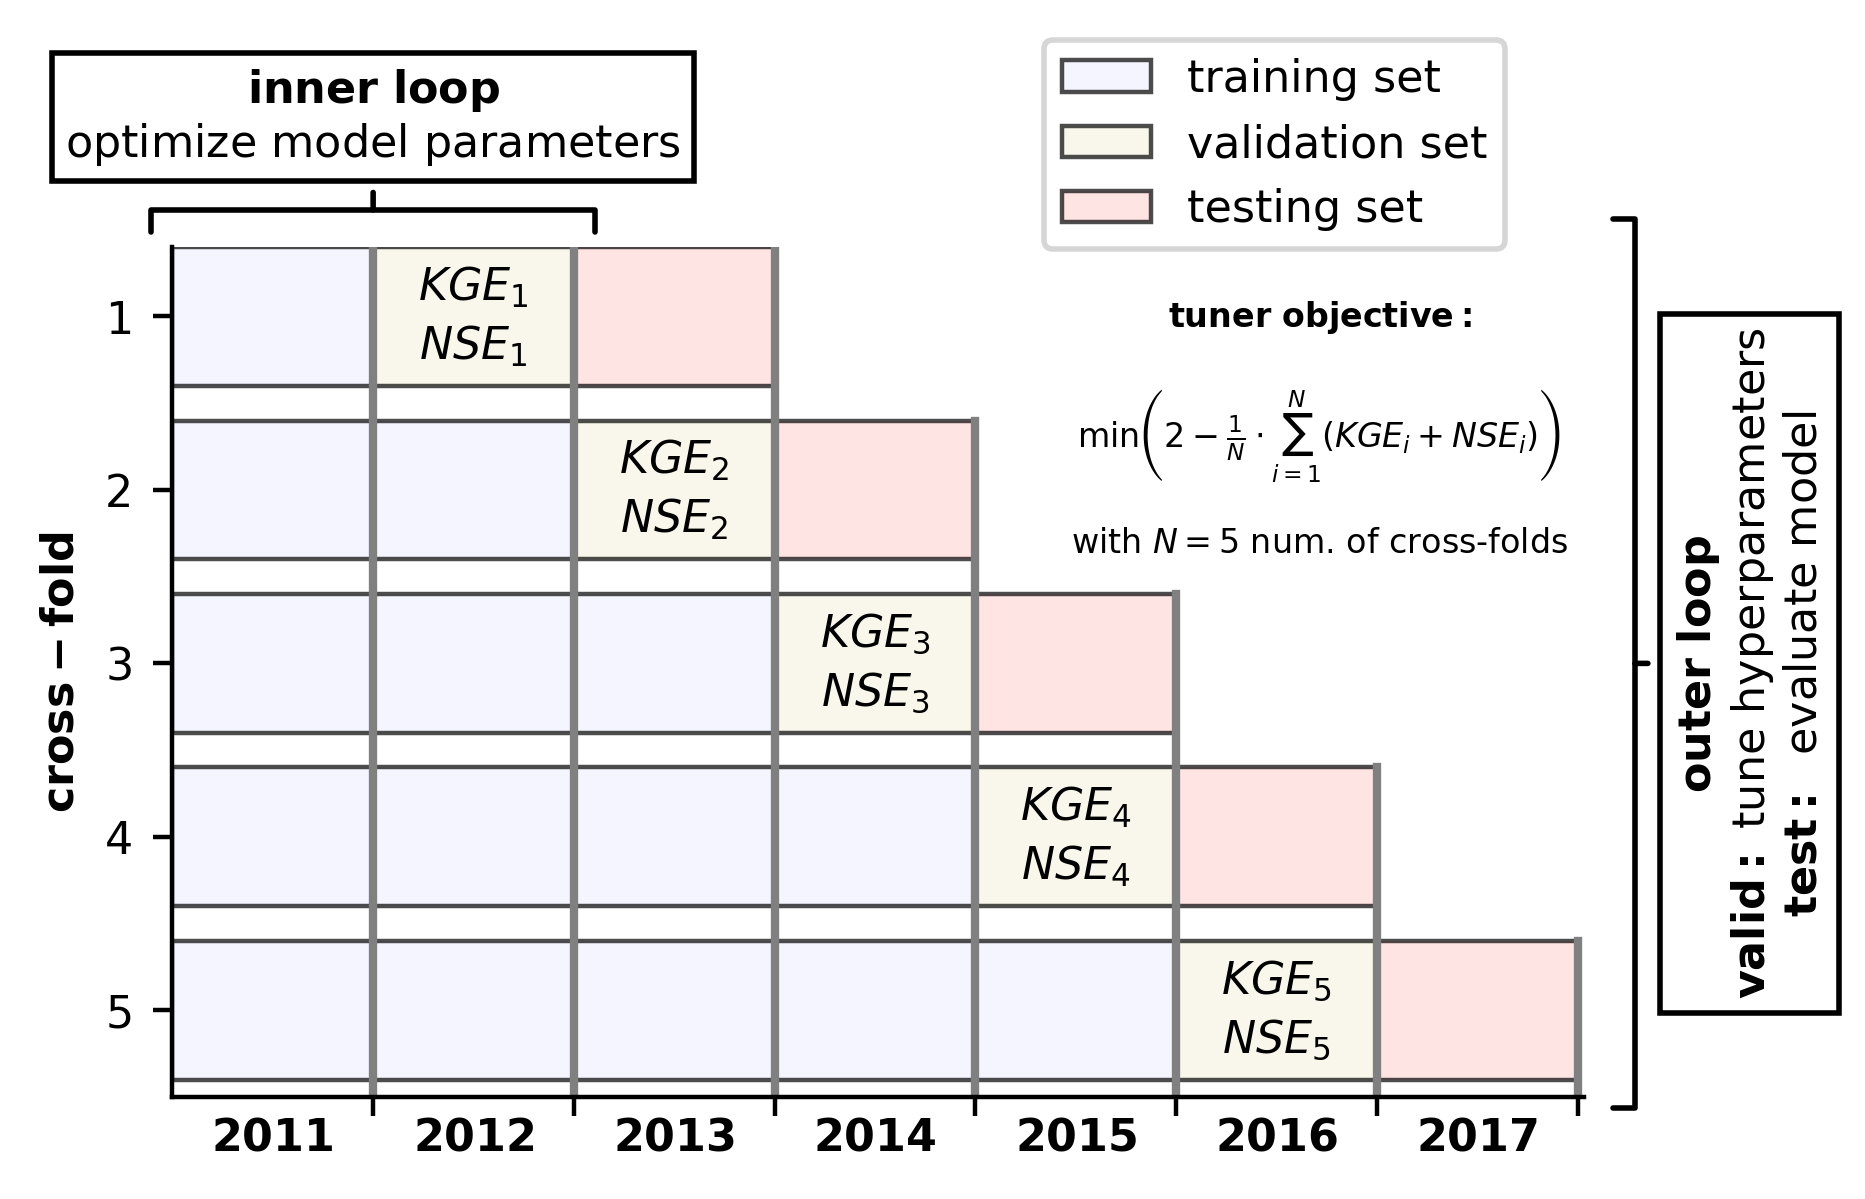

In [5]:
idx_splits = [int(x*n_samples/n_folds) for x in range(n_folds+1)]

n_per_fold = [idx_splits[x] - idx_splits[x-1] for x in range(1, n_folds+1)]
years = [x for x in range(inital_year, inital_year+n_folds)]
    

fig, ax = plt.subplots(figsize=(4.72,3), dpi=400)

idx_train = []
for idx_fold in range(n_folds-2):
    idx_test   = (idx_splits[idx_fold+2], idx_splits[idx_fold+3])
    idx_valid  = (idx_splits[idx_fold+1], idx_splits[idx_fold+2])
    idx_train  = (idx_splits[0],          idx_splits[idx_fold+1])

    ax.text(np.mean(idx_valid), 5-idx_fold+0.17, f"$KGE_{idx_fold+1}$",
           va="center", ha = "center")
    ax.text(np.mean(idx_valid), 5-idx_fold-0.17, f"$NSE_{idx_fold+1}$",
           va="center", ha = "center")

    ax.add_patch(getPolygon(idx_test,  5-idx_fold, 0.8, "#ffd9d9")) 
    ax.add_patch(getPolygon(idx_valid, 5-idx_fold, 0.8, "#f7f4e4")) 
    ax.add_patch(getPolygon(idx_train, 5-idx_fold, 0.8, "#f2f2ff")) 
    
    
ax.text(idx_test[0]-1e4, 5.1, r"$\mathbf{tuner\ objective:}$" + "\n"+ "\n" + r"$\min\left( 2-\frac{1}{N}\cdot\sum_{i=1}^{N}\left(KGE_i+NSE_i\right)\right)$" + "\n"+ "\n" + r"$\text{with }N=5 \text{ num. of cross-folds}$",
           va="top", ha = "center", fontsize=6)

ax.annotate(r"$\mathbf{{outer\ loop}}$" + "\n" + r"$\mathbf{{valid:}}\text{ tune hyperparameters}$" + "\n" + r"$\mathbf{{test:}}\text{  evaluate model}$", 
           xy=(idx_splits[-1]+8e3, 3),  
           xytext=(idx_splits[-1]+3.e4, 3),
           bbox=dict(boxstyle='square', fc='white', color='k', lw=1.0),
           arrowprops=dict(arrowstyle='-[, widthB=10, lengthB=0.5', lw=1.0, color='k'),
           ha='center', rotation=90, va="center", annotation_clip=False)

ax.annotate(r"$\mathbf{{inner\ loop}}$" + "\n" + r"$\text{optimize model parameters}$", 
           xy=(idx_splits[1], 5.55),  
           xytext=(idx_splits[1], 6.15),
           bbox=dict(boxstyle='square', fc='white', color='k', lw=1.0),
           arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=0.5', lw=1.0, color='k'),
           ha='center', va="center", annotation_clip=False)
    
ax.set_xticks(idx_splits[1:])
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_locator(ticker.FixedLocator([x - idx_splits[1]/2  for x in idx_splits[1:]]))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter([fr"$\mathbf{{{x}}}$" for x in years]))
ax.tick_params(axis="x", which='minor',length=0)

ax.yaxis.set_major_locator(ticker.FixedLocator([x for x in range(1,6)]))
ax.yaxis.set_major_formatter(ticker.FixedFormatter([f"{x}" for x in range(5,-1,-1)]))


for x in range(1,8):
    if x > 3:
        ymax = 5.4 - (x-3)
    else:
        ymax = 5.4
    ax.plot([idx_splits[x], idx_splits[x]], [0,ymax], c="grey")
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim((0, n_samples+1000))
ax.set_ylim((0.5, 5.4))

ax.set_ylabel(rf"$\bf cross-fold$")

fig.tight_layout()
ax.legend(
        [Patch(facecolor="#f2f2ff", alpha = 0.7, edgecolor="k", ls="-", lw=0.8), 
         Patch(facecolor="#f7f4e4", alpha = 0.7, edgecolor="k", ls="-", lw=0.8),  
         Patch(facecolor="#ffd9d9", alpha = 0.7, edgecolor="k", ls="-", lw=0.8), 
        ],
        ["training set", 
         "validation set", 
         "testing set",
        ],
        loc='upper right', bbox_to_anchor=(0.96, 1.27), #(0.96, 1.03)
    )


In [6]:
fig.savefig(os.path.join(PLOT_PATH, 'fig4_ts_cross_valid.png'), bbox_inches="tight", dpi=300)